In [28]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as tranforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random
import torch.optim as optim

In [29]:
USE_CUDA=torch.cuda.is_available()
device=torch.device('cuda' if USE_CUDA else 'cpu')
print("다음 기기 사용 : ", device)

다음 기기 사용 :  cpu


In [30]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(7777)

In [31]:
training_epochs=15
batch_size=100

In [32]:
mnist_train=dsets.MNIST(root='data/MNIST_data',
                        train=True,
                        transform=tranforms.ToTensor(),
                        download=True)
mnist_test=dsets.MNIST(root='/data/MNIST_data',
                       train=False,
                       transform=tranforms.ToTensor(),
                       download=True)

In [33]:
data_loader=DataLoader(dataset=mnist_train,
                       batch_size=batch_size,
                       shuffle=True,
                       drop_last=True)

In [34]:
data_loader

In [35]:
for X, Y in data_loader : 
    print(X.size())
    print(Y.size())

torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([1

In [36]:
linear=nn.Linear(784,10, bias=True).to(device)
#optimizer=optim.SGD(linear.parameters(), lr=0.1)

In [37]:
criterion=nn.CrossEntropyLoss().to(device)
optimizer=optim.SGD(linear.parameters(), lr=0.1)

In [40]:
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=len(data_loader)
    
    for X, Y in data_loader:
        X=X.view(-1, 28*28).to(device)
        Y=Y.to(device)
        
        optimizer.zero_grad()
        y_hat=linear(X)
        cost=criterion(y_hat, Y)
        
        cost.backward()
        optimizer.step()
        avg_cost+=cost/total_batch
    
    print('Epoch:', epoch, 'Cost:', avg_cost.item())
print("Learning finished")    

Epoch: 0 Cost: 0.2640196681022644
Epoch: 1 Cost: 0.26329630613327026
Epoch: 2 Cost: 0.262424111366272
Epoch: 3 Cost: 0.26177412271499634
Epoch: 4 Cost: 0.26114311814308167
Epoch: 5 Cost: 0.2608567774295807
Epoch: 6 Cost: 0.2602662742137909
Epoch: 7 Cost: 0.25947755575180054
Epoch: 8 Cost: 0.2591279149055481
Epoch: 9 Cost: 0.2585380971431732
Epoch: 10 Cost: 0.25800928473472595
Epoch: 11 Cost: 0.25761982798576355
Epoch: 12 Cost: 0.25713634490966797
Epoch: 13 Cost: 0.25673457980155945
Epoch: 14 Cost: 0.25616785883903503
Learning finished


Accuracy :  0.8769000172615051
Label : tensor([0])
tensor([[ 3009.2642, -2880.0227,   927.8267,   224.3715, -1537.3815,   551.5864,
           854.8724, -2091.2527,  1367.1530,  -413.0484]])
single_prediction :  0


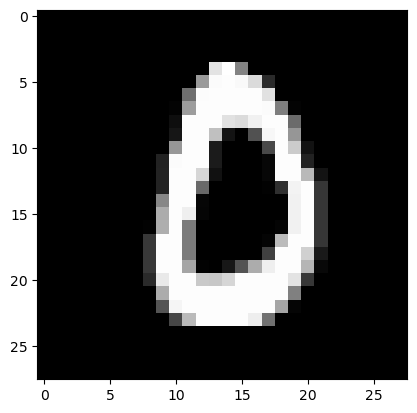

In [56]:
with torch.no_grad() :  # gradient 계산 수행하지 않도록 함
    x_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    y_test = mnist_test.test_labels.to(device)

    prediction=linear(x_test)
    correct_prediction=torch.argmax(prediction, 1) == y_test
    accuracy=correct_prediction.float().mean()
    print('Accuracy : ',accuracy.item())

    r=random.randint(0, len(mnist_test)-1)
    x_single_data=mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    y_single_data=mnist_test.test_labels[r:r+1].to(device)
    print('Label :',y_single_data)
    single_prediction=linear(x_single_data)
    print(single_prediction)
    print('single_prediction : ', torch.argmax(single_prediction,1).item())

    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='gray', interpolation='nearest')
    plt.show()